# Project Context: Automatidata and NYC TLC

This project is being undertaken by a data professional at Automatidata, a fictional data consulting firm. The team is currently in the early stages of the project, having completed an initial plan of action and some preliminary Python coding work.


**This activity focuses on examining provided data and preparing it for analysis. It also involves designing a professional data visualization that effectively communicates insights and supports data-driven business decisions.**


# Exploratory Data Analysis: NYC Taxi Data Project

The Tableau visualization component is an optional but highly recommended exercise. It provides an opportunity to practice planning and plotting data visualizations based on specific business needs, emulating the types of proposals commonly encountered in a data professional's career.

**Project Purpose:** The purpose of this project is to conduct exploratory data analysis on a provided dataset. This involves continuing the investigation initiated in Course 2 and performing further EDA with the aim of gaining deeper insights into the variables.

**Project Goal:** The goal is to clean the dataset and create a compelling visualization.

This activity is structured into four parts:

**Part 1:** Imports, links, and data loading.

**Part 2:** Data Exploration and Data Cleaning.

**Part 3:** Building visualizations.

**Part 4:** Evaluating and sharing results.


# **Visualize a story in Tableau and Python**

 **PACE stages** 

   * Plan
   * Analyze
   * Construct
   * Execute


## PACE: Plan

This stage outlines the planning considerations, particularly regarding outlier identification.

**Methods for Identifying Outliers:**

Effective methods for identifying outliers include:

* Investigation of the mean() and median() of the data to understand the range of data values.
* Utilization of box plots to visualize the distribution of the data and highlight potential outliers.
* Application of histograms to visualize the distribution of the data, which can reveal unusual data points or distributions.




**Decision-Making for Outlier Inclusion or Exclusion in Models:**

The approach to handling outliers—whether to retain, remove, or reassign their values—is a critical decision influenced by the nature of the outlying data and the assumptions of the intended model. General guidelines for this decision-making process include:

* **Deletion:** Outliers are typically deleted when they are confidently identified as mistakes, typos, or data entry errors, especially if the dataset is intended for robust modeling or machine learning applications. This option is generally used sparingly.

* **Reassignment:** For smaller datasets or when the data is being prepared for modeling, deriving and assigning new values to replace outlier observations is often a preferred strategy. This helps to mitigate their undue influence while preserving the overall dataset size.

* **Retention:** Outliers are most likely to be retained when the primary purpose is exploratory data analysis (EDA) or general analysis, or when the dataset is being prepared for a model that is inherently robust or resistant to the influence of outliers.


### Task 1. Data Import and Setup

This section outlines the initial steps for data preparation, including necessary imports and data loading, along with reference to supporting visualization tools.

**Supporting Visualization Platform:**
Tableau Public is utilized as a platform for developing interactive data visualizations.
Tableau Public: https://public.tableau.com/app/profile/sithara.jerry/viz/Course3_Automatidataproject_17333125731320/Sheet2

**Note:** To identify outliers in Trip Distance using Tableau, I created a Calculated Field to flag trips where the distance is zero. These trips are invalid or represent potential outliers. This approach helps in visualizing and isolating trips with zero.

**Data Exploration Setup:**

For the exploratory data analysis (EDA) of the dataset, essential Python libraries such as `pandas` for data manipulation, `numpy` for numerical operations, and `matplotlib` (often alongside `seaborn`) for data visualization are employed.



In [162]:
# Import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns


In [164]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')



## PACE: Analyze 


### Task 2a. Data Exploration and Cleaning

This phase involves a critical assessment of the dataset to prepare it for analysis.

**Column Applicability and Selection:**

The initial step in data assessment involves understanding the dataset's characteristics, including its size, shape, and composition. This leads to considerations regarding:

* Identifying the most applicable data columns given the project scenario.
* Determining which data columns can be eliminated, as they may not contribute to solving the identified problem.

Functions commonly utilized to understand and structure the data include:
* `head()`: To view the first few rows of the DataFrame.
* `describe()`: To generate descriptive statistics of numerical columns.
* `info()`: To obtain a concise summary of the DataFrame, including data types and non-null values.
* `groupby()`: For grouping data based on one or more columns.
* `sort_values()`: For sorting the DataFrame by specified columns.

**Handling Missing Data:**

The process for addressing missing data involves:

* **Identification:** Missing data is identified using methods such as `df.isnull().sum()` to check for columns with missing values and their proportions. Visualizations like heatmaps (`sns.heatmap(df.isnull(), cbar=False)`) are also employed to understand the extent of missing data.
* **Treatment Decision:** The decision on how to treat missing values is guided by the data's nature and the analysis goals:
    * **Deletion:** If missing data is minimal (e.g., less than 5%), rows or columns containing nulls may be removed without significant impact on the analysis.
    * **Imputation:** For numerical data, missing values can be filled with the mean or median. For categorical data, replacement with the most common category or a designated placeholder is considered.
    * **Flagging:** A separate indicator can be created to mark rows where data was missing for future reference or specific model considerations.
* **Best Practices:** It is crucial to understand the underlying cause of missing data to inform the treatment decision. Any chosen treatment must align with the overall analysis goals, and completeness should be rechecked after handling missing data.

**Outlier Identification and Handling:**

Outliers are identified and assessed for their potential impact on the analysis and modeling.

* **Identification:** For instance, to identify outliers in `trip_distance`, a calculated field in Tableau can be used to flag trips where the distance is zero, indicating invalid or erroneous entries. This approach aids in visualizing and isolating such trips.
* **Handling Considerations:** The decision to keep, remove, or reassign outliers is made based on their nature and the robustness of the models being built, as discussed in the "PACE: Plan - Outlier Handling Decisions" section.

**Variable Distribution Insights:**

The distributions of variables are examined to gain insights into the underlying patterns and how they relate to the analytical questions or the problem being solved. This involves understanding the spread, central tendency, and shape of each variable's data.


**To identify outliers in Trip Distance using Tableau, I created a Calculated Field to flag trips where the distance is zero. These trips are invalid or represent potential outliers. This approach helps in visualizing and isolating trips with zero.**


In [169]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [171]:
 df.size


408582

In [173]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**There is no missing data according to the results from the info() function.**

### Task 2b. Assess whether dimensions and measures are correct

#### Data Type Verification and Conversion

Ensuring appropriate data types for each column is crucial for accurate analysis and visualization. This process involves verification within both Tableau and Python environments.

**In Tableau:**

On the data source page, a review of column data types is conducted, with particular attention to dimensions and measures. For instance:

* Columns such as `PULocationID`, `DOLocationID`, and `RateCodeID`, while appearing as numerical values, represent categorical identifiers. These are explicitly changed from Measures to Dimensions to reflect their qualitative nature.
* `tpep_pickup_datetime` and `tpep_dropoff_datetime` are verified to be correctly set as Date/Time fields. This ensures their utility for time-based analyses, including calculating trip durations or filtering data by specific periods.

**In Python:**

The data types of columns are examined to confirm their logical consistency with the data they represent:

* **Categorical Identifiers:** Columns like `PULocationID`, `DOLocationID`, and `RateCodeID` are often initially loaded as numeric (`int64`). To accurately represent their categorical nature, these are converted to an `object` (or `category`) data type using Pandas.
* **Date/Time Variables:** Columns such as `tpep_pickup_datetime` and `tpep_dropoff_datetime`, which might be imported as strings, are converted to the appropriate `datetime` format using Pandas. This conversion is essential for enabling precise time-based calculations and visualizations.



### Task 2c. Select visualization type(s)

#### Data Visualization Types for Exploratory Data Analysis (EDA)

With the relevant data columns identified, the selection of appropriate data visualization types is crucial for effective EDA of the TLC dataset. The following visualization types are particularly helpful for understanding and explaining the data:

* **Bar chart, box plot, histogram, and scatter plot** will be most helpful in understanding this data.

    * A **box plot** and **histogram** will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`.

    * A **scatter plot** will be helpful to visualize the trends and patterns and outliers of critical variables, such as `trip_distance` and `total_amount`.

    * A **bar chart** will help determine the average number of trips per month, weekday, weekend, etc.



## PACE: Construct 


### Task 3. Data Visualization

Following the data assessment and identification of applicable variables, the next step involves generating relevant data visualizations.


### Boxplots

Perform a check for outliers on relevant columns such as `trip_distance` and `trip_duration`. Box plots and histograms are effective methods for identifying the presence of outliers in data distributions.

**Note:** Ensure that date columns are converted to datetime format to accurately derive the total trip duration.

In [186]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])  

**trip distance**

<Axes: title={'center': 'trip distance'}, xlabel='trip_distance'>

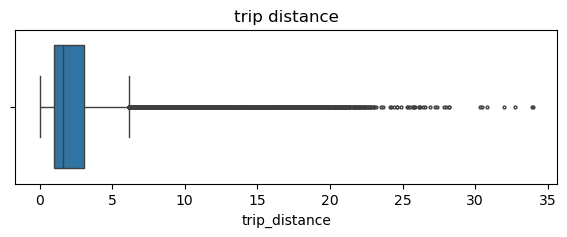

In [189]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip distance')
sns.boxplot(x = df['trip_distance'],fliersize = 2) 

Text(0.5, 1.0, 'Trip distance histogram')

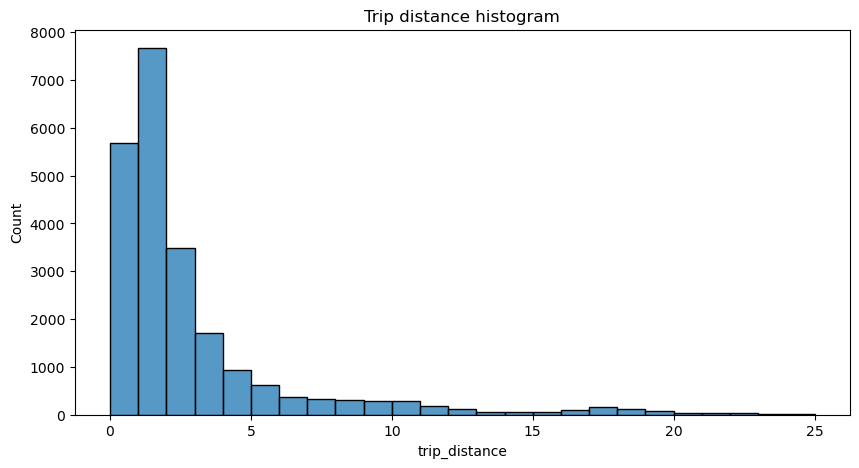

In [191]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins = range(0,26,1))
plt.title('Trip distance histogram')

**Most of the trips were short, typically less than two miles. As the distance of the trips increased beyond two miles, the number of trips started to drop sharply. This means that fewer people took longer trips.**

**total amount**

<Axes: title={'center': 'total_amount'}, xlabel='total_amount'>

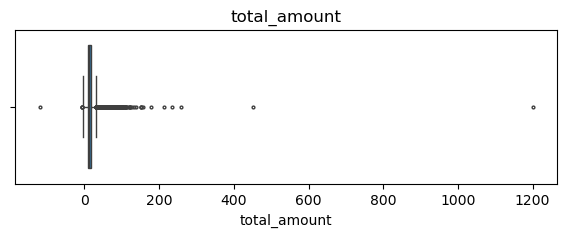

In [195]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x = df['total_amount'],fliersize = 2) 

Text(0.5, 1.0, 'Total amount histogram')

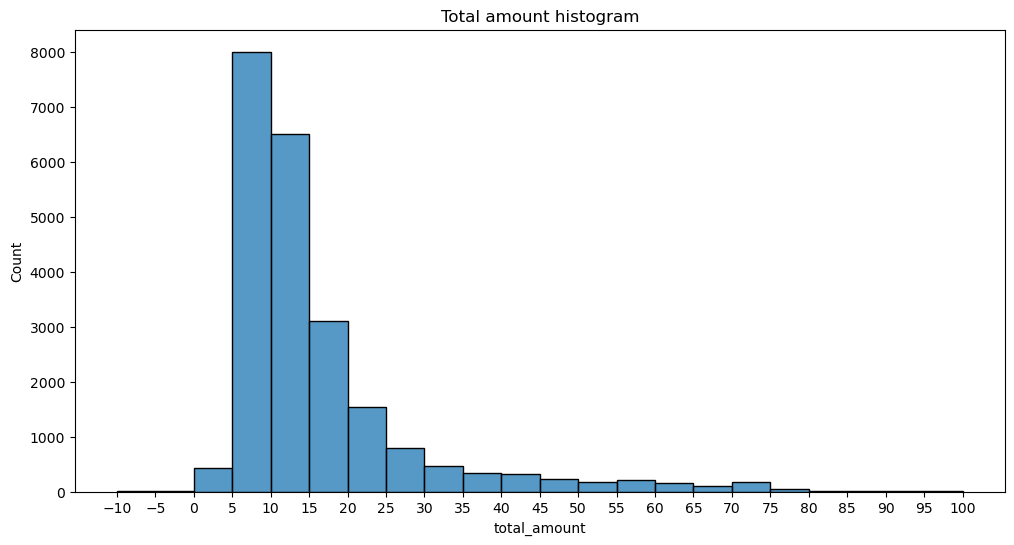

In [197]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins = range(-10,101,5))
ax.set_xticks(range(-10,101,5))
plt.title('Total amount histogram')

**Although most trips have a cost within the $5-15 range, there are some trips with much higher costs. These higher costs pull the average (mean) to the right, creating a "rightward skew" in the distribution.**

**tip amount**

<Axes: title={'center': 'tip_amount'}, xlabel='tip_amount'>

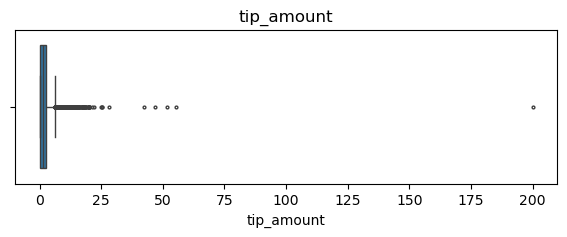

In [201]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x = df['tip_amount'],fliersize = 2) 

Text(0.5, 1.0, 'Tip amount histogram')

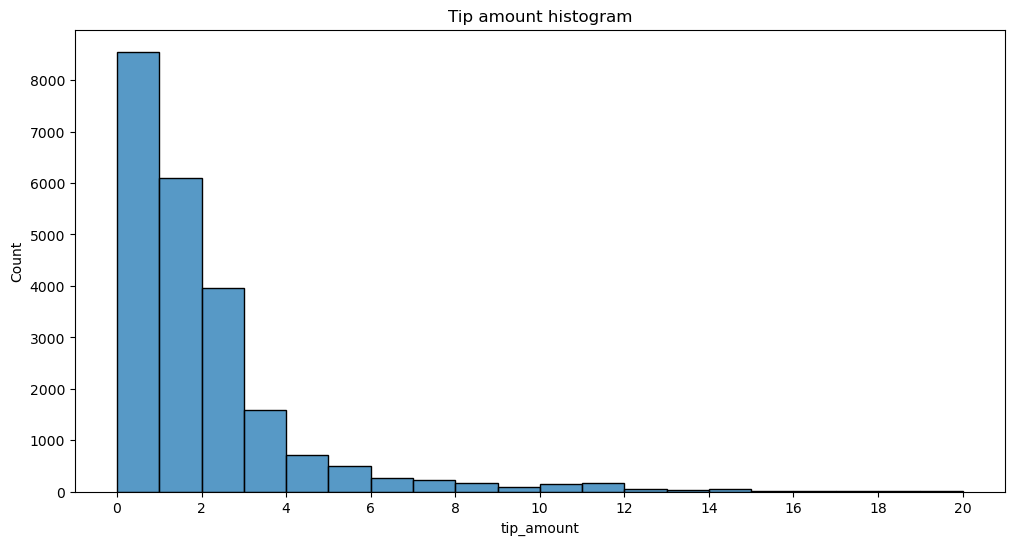

In [203]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins = range(0,21,1))
ax.set_xticks(range(0,21,2))
plt.title('Tip amount histogram')

**Most of the tips are between dollar 0-3 range, and the distribution has a long tail on the right side, meaning there are a few trips with much higher tip amounts.The average tip amount is pulled higher due to a few larger tip amounts, even though most tips are between dollar 0-3.**

**tip_amount by vendor**

Text(0.5, 1.0, 'Tip amount by vendor histogram')

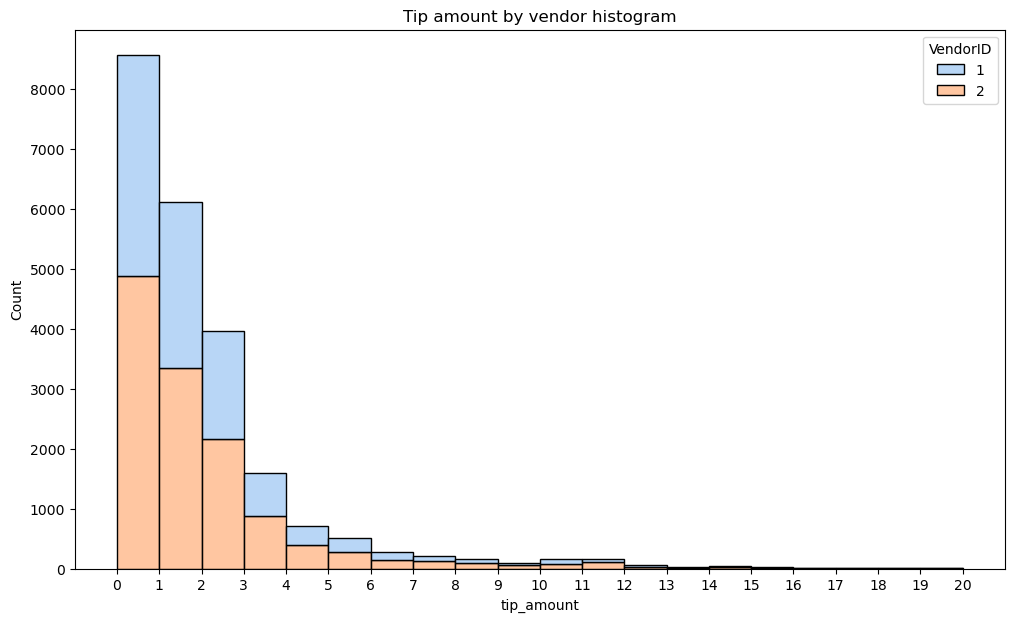

In [207]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data = df, x = 'tip_amount', 
                  bins = range(0,21,1),
                  hue ='VendorID',
                  multiple ='stack',
                  palette = 'pastel' )
ax.set_xticks(range(0,21,1))
plt.title('Tip amount by vendor histogram')

**When we look at the tip amounts for each vendor, we see that both vendors have similar tip patterns. Vendor two has provided a greater number of rides compared to Vendor one, but this difference remains consistent across all tip amounts. There's nothing unusual or unexpected in how the tips are distributed between the two vendors.**

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

Text(0.5, 1.0, 'Tip amount by vendor histogram for tips > $10')

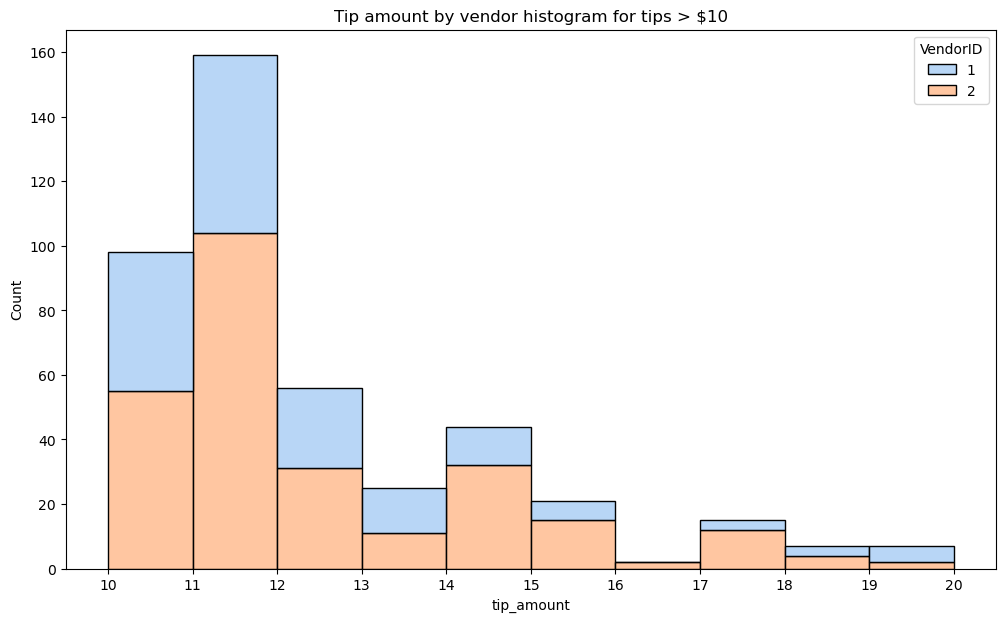

In [211]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount']>10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data = tips_over_ten , x = 'tip_amount', 
                  bins = range(10,21,1),
                  hue ='VendorID',
                  multiple ='stack',
                  palette = 'pastel' )
ax.set_xticks(range(10,21,1))
plt.title('Tip amount by vendor histogram for tips > $10')

**The proportions between the two vendors stay consistent even for higher tip amounts, except at the very highest tips. However, this exception isn't important because there are very few trips with such high tip amounts**

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [215]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

**Most rides(Nearly two thirds of the rides ) had just one passenger, but some rides had up to six passengers, with nearly 700 such rides. There are also 33 rides listed with zero passengers, which doesn’t make sense. These zero-passenger rides will likely be removed unless we find an explanation for them.**

In [218]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()
mean_tips_by_passenger_count = mean_tips_by_passenger_count.reset_index()
mean_tips_by_passenger_count.columns = ['passenger_count', 'tip_amount']
mean_tips_by_passenger_count


,passenger_count,tip_amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


/var/folders/x2/sq2yb3ds0zq2vzjfs86q62440000gn/T/ipykernel_8082/1464728634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data = mean_tips_by_passenger_count.tail(-1),  # Data source


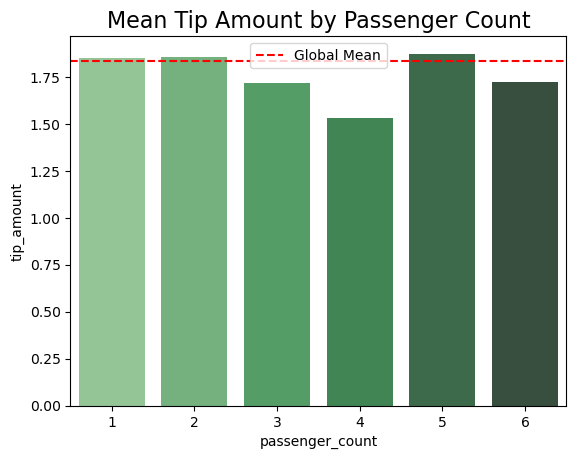

In [220]:
# Create bar plot for mean tips by passenger count
# Plotting
sns.barplot( data = mean_tips_by_passenger_count.tail(-1),  # Data source
    x='passenger_count',      # x-axis: passenger count
    y='tip_amount',           # y-axis: mean tip amount
    palette='Greens_d'         # Color palette
)
# Add a global mean line
global_mean = df['tip_amount'].mean()
plt.axhline(global_mean, ls='--', color='red', label='Global Mean')

# Add labels and title
plt.title('Mean Tip Amount by Passenger Count', fontsize=16)

# Add legend for the global mean
plt.legend()

# Show the plot
plt.show()


**The tip amount doesn't change much with the number of passengers. However, for rides with four passengers, the tip is a bit lower. This is because there were fewer rides with four passengers (aside from rides with zero passengers).**



**Create month and day columns**

In [224]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [227]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

**The months are out of order.**

Reorder the results to put the months in calendar order.

In [231]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [233]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

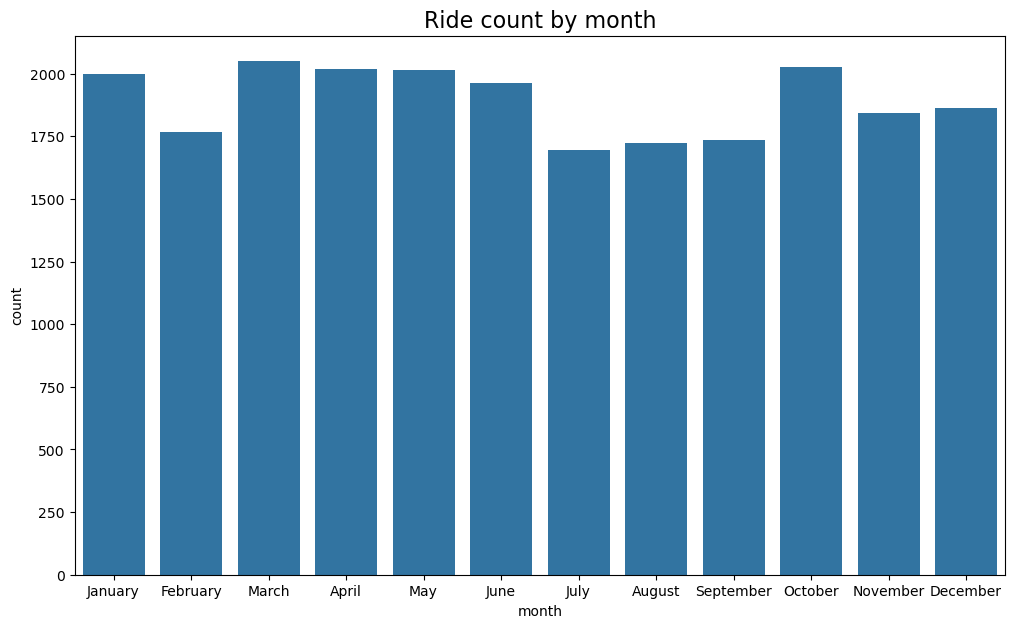

In [235]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
sns.barplot(x = monthly_rides.index, y = monthly_rides)
plt.title('Ride count by month', fontsize=16);

**Monthly rides are mostly steady, but there are noticeable drops in July, August, September, and February.**

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [239]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
daily_rides
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides



day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

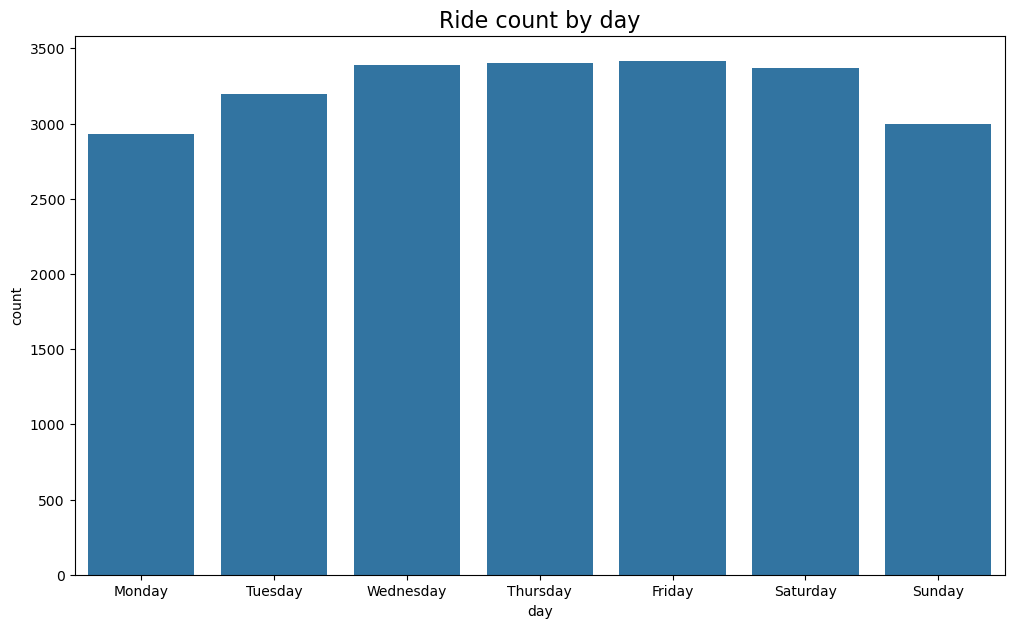

In [241]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
sns.barplot(x = daily_rides.index, y = daily_rides)
plt.title('Ride count by day', fontsize=16);          

**Wednesday to Saturday had the most daily rides, while Sunday and Monday had the fewest.**


**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [245]:
# Repeat the process, this time for total revenue by day
# Group by month and sum total_amount
total_amount_day = df.groupby('day')['total_amount'].sum()

# Reindex the result by month_order
total_amount_day = total_amount_day.reindex(day_order)

# Convert to a DataFrame 
total_amount_day = total_amount_day.reset_index()


# Display the result
total_amount_day



,day,total_amount
0,Monday,49574.37
1,Tuesday,52527.14
2,Wednesday,55310.47
3,Thursday,57181.91
4,Friday,55818.74
5,Saturday,51195.40
6,Sunday,48624.06


Text(0.5, 1.0, 'Total revenue by day')

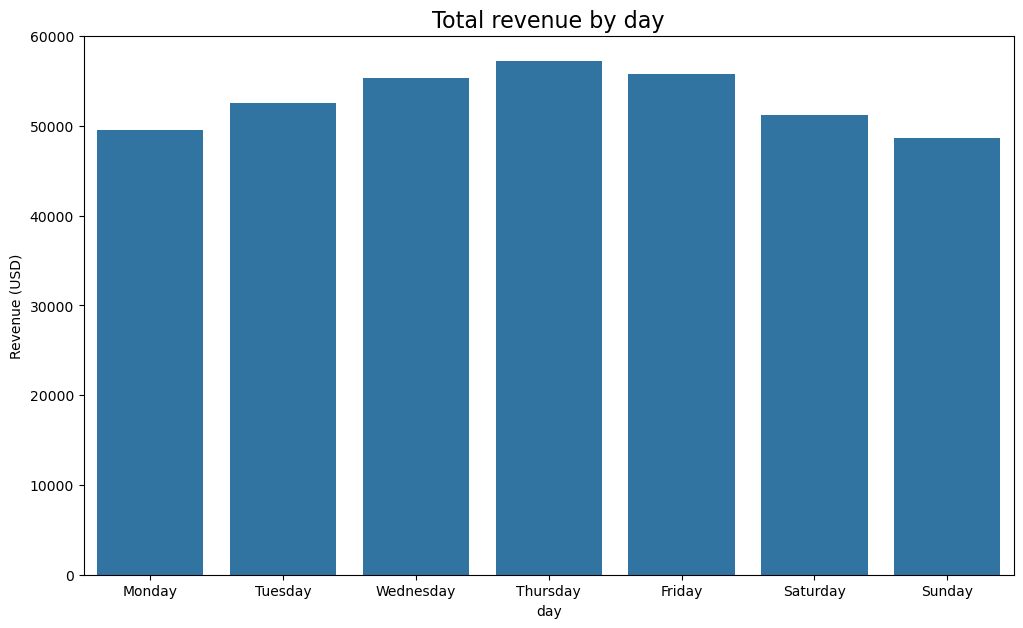

In [247]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day['day'], y=total_amount_day['total_amount'])
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16)

**Thursday had the highest revenue, and Sunday and Monday had the lowest. Even though Saturday had almost the same number of rides as Thursday(Saturday had just 35 fewer rides than Thursday), its revenue was about $6,000 lower, showing that ride count alone doesn’t always explain the revenue difference.**

**Plot total revenue by month**

In [251]:
# Repeat the process, this time for total revenue by month
# Group by month and sum total_amount
total_amount_month = df.groupby('month')['total_amount'].sum()

# Reindex the result by month_order
total_amount_month = total_amount_month.reindex(month_order)

# Convert to a DataFrame 
total_amount_month = total_amount_month.reset_index()


# Display the result
total_amount_month

,month,total_amount
0,January,31735.25
1,February,28937.89
2,March,33085.89
3,April,32012.54
4,May,33828.58
5,June,32920.52
6,July,26617.64
7,August,27759.56
8,September,28206.38
9,October,33065.83


Text(0.5, 1.0, 'Total revenue by month')

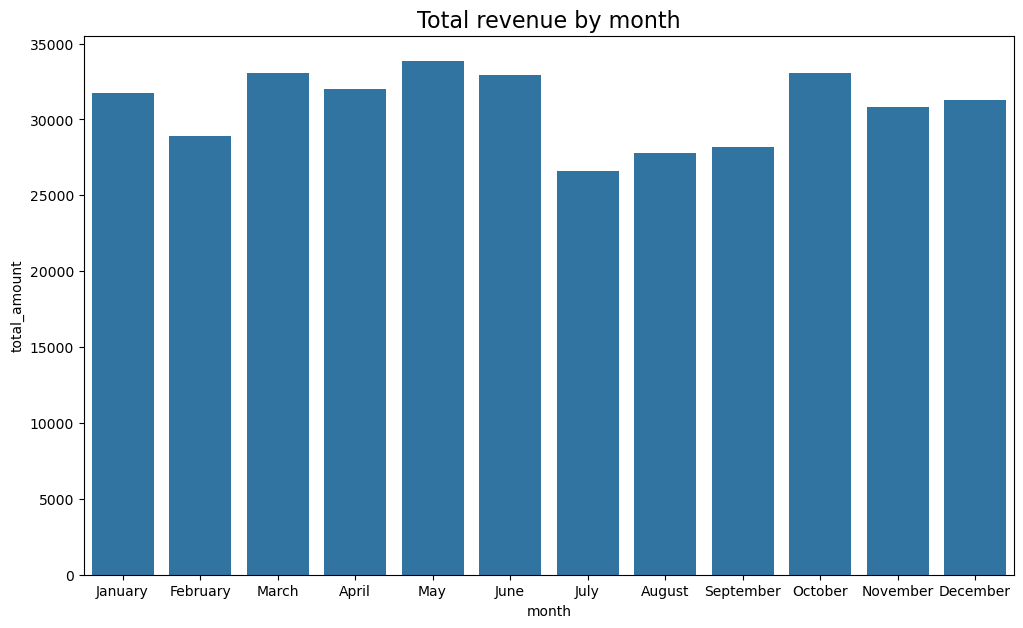

In [253]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
sns.barplot(x = total_amount_month['month'], y = total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16)

**Monthly revenue follows a similar pattern to monthly rides, with drops in July, August, September, and February.**

#### Scatter plot

Tableau Public: https://public.tableau.com/app/profile/sithara.jerry/viz/Course3_Automatidataproject_17333125731320/Sheet2


**Plot mean trip distance by drop-off location**

In [258]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [260]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean()
# convert the result to a DataFrame
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean().reset_index()

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff



,DOLocationID,trip_distance
164,207,1.200000
154,193,1.390556
192,237,1.555494
189,234,1.727806
109,137,1.818852
...,...,...
40,51,17.310000
5,11,17.945000
167,210,20.500000
21,29,21.650000


Text(0.5, 1.0, 'Mean trip distance by drop-off location')

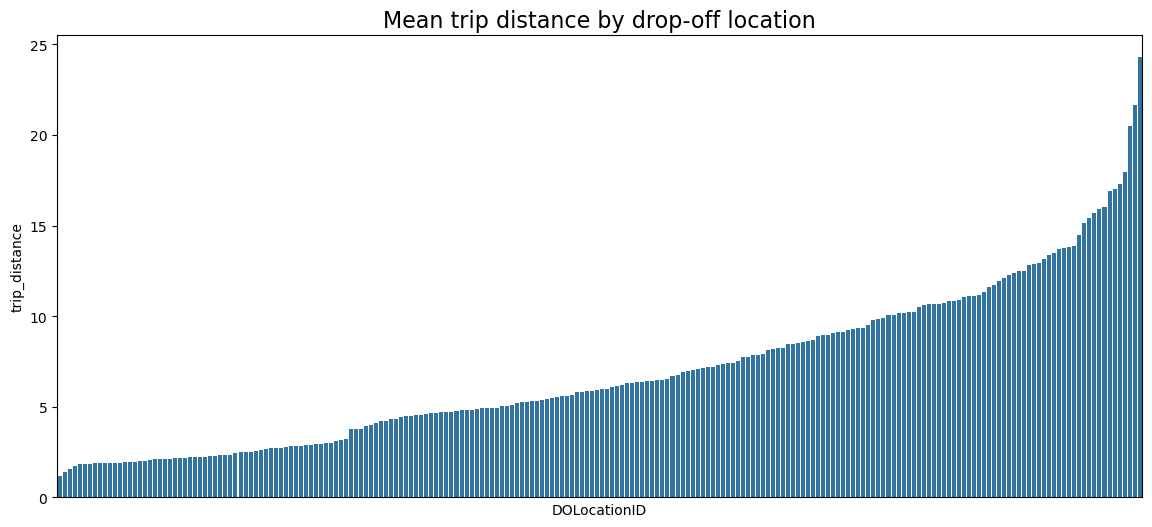

In [262]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x= distance_by_dropoff['DOLocationID'], y= distance_by_dropoff['trip_distance'],order = distance_by_dropoff['DOLocationID']) 
ax.set_xticklabels([]) # Removes tick labels
ax.set_xticks([])# Removes tick marks
plt.title('Mean trip distance by drop-off location', fontsize=16)

**This plot shows a smooth curve that resembles a normal distribution, indicating that the drop-off points are spread evenly across the area. When locations are spread evenly, they cover different parts of the area without favoring any specific zone. This is what we call a "balanced distribution," where each area likely has a similar number of drop-offs, without one region being overrepresented. This is important because the dataset does not include geographic coordinates, so we couldn't directly check the distribution of locations.**


## PACE: Execute 


### Task 4a. Results and evaluation



**I have learned...**

* Trip distances: Most trip distances are under 5 miles, but there are some extreme outliers where trips go up to 35 miles.
* Missing values: There are no missing values in the dataset, which is good since it means the data is complete.

**My other questions are ....** 

* Trips with "0.0" distance: These could be trips where the vehicle didn’t move (like a cancellation or very short trip). They might also be errors in the data.
* Impact on the model: These "0.0" trips could affect your analysis.We might choose to ignore them, treat them differently, or look at them separately if they’re valid (like short trips).

**My client would likely want to know ...**
* The data includes the times when a trip starts (pickup time) and when it ends (drop-off time). By calculating the difference between these two times, we can figure out how long each trip took (trip duration). This is useful for client because knowing how long trips take can help improve things like:

    * optimizing routes: Identifying faster routes based on trip duration.
    * Improving fare calculations: More accurate trip duration helps with better pricing for customers.
    *  by knowing trip durations, the company can make smarter decisions on when and how to schedule drivers and make the process more efficient.
* This would likely be something that will help the client with their model.

In [268]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [270]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26


### Task 4b. Conclusion



**EDA is important because ...** 
* EDA helps a data professional understand the data, find any unusual values, fix missing data, and get it ready for analysis or predictions


**Visualizations helped me understand ..**
* This dataset has some outliers, and we need to decide how to handle them before building a model.
